## Sim Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from env.imports import *

/ext3/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2025-05-28 14:39:54.262643: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-28 14:39:55.983004: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 14:39:58.079885: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
  import numpy.matlib as npm

  au

In [3]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run) 

absolute_root_path /scratch/asr655/neuroinformatics/GeneEx2Conn
absolute_root_path /scratch/asr655/neuroinformatics/GeneEx2Conn


<module 'sim.sim_run' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/sim/sim_run.py'>

#### Check job specs

In [4]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 2.4%
RAM Usage: 4.2%
Available RAM: 964.6G
Total RAM: 1007.0G
52.4G


In [5]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


None
Available GPUs: 1
GPU 0: NVIDIA A100-SXM4-80GB - Memory Allocated: 0.00 GB


In [6]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [7]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

#### Simulation tests <a id="sims"></a>

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
feature_name:  transcriptome
processing_type:  None
features ['transcriptome']
X generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: 14abfd4d
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/14abfd4d
Initialized sweep with ID: 14abfd4d
1
2
3
BEST CONFIG {'input_dim': 14760, 'binarize': False, 'token_encoder_dim': 60, 'd_model': 128, 'encoder_output_dim': 10, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [256, 128], 'cls_init': 'spatial_learned', 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 9e-05, 'weight_decay': 0.0001, 'batch_size': 512, 'aug_prob': 0.5, 'epochs': 100}


  warnings.warn(



Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.07 GB


  warnings.warn(



Best val loss so far at epoch 1: 0.0374
Best val loss so far at epoch 2: 0.0343
Best val loss so far at epoch 3: 0.0292
Best val loss so far at epoch 4: 0.0286
Best val loss so far at epoch 5: 0.0270
Epoch 5/100, Train Loss: 0.0743, Val Loss: 0.0270, Time: 6.04s
Best val loss so far at epoch 6: 0.0247
Best val loss so far at epoch 8: 0.0209
Best val loss so far at epoch 9: 0.0205
Best val loss so far at epoch 10: 0.0190
Epoch 10/100, Train Loss: 0.0556, Val Loss: 0.0190, Time: 6.06s
Best val loss so far at epoch 11: 0.0184
Best val loss so far at epoch 12: 0.0166
Best val loss so far at epoch 15: 0.0158
Epoch 15/100, Train Loss: 0.0457, Val Loss: 0.0158, Time: 6.35s
Best val loss so far at epoch 16: 0.0157
Best val loss so far at epoch 17: 0.0150
Best val loss so far at epoch 18: 0.0143
Epoch 20/100, Train Loss: 0.0351, Val Loss: 0.0149, Time: 5.71s
Best val loss so far at epoch 21: 0.0118
Epoch 25/100, Train Loss: 0.0303, Val Loss: 0.0121, Time: 5.60s
Best val loss so far at epoch 29:

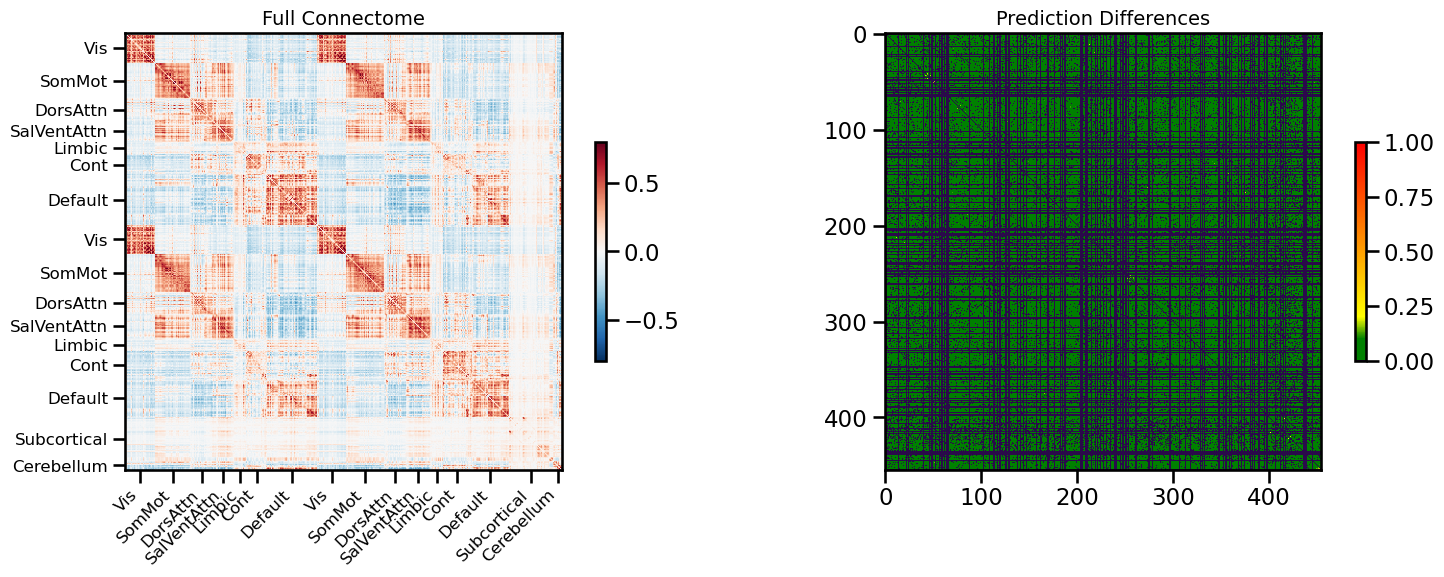

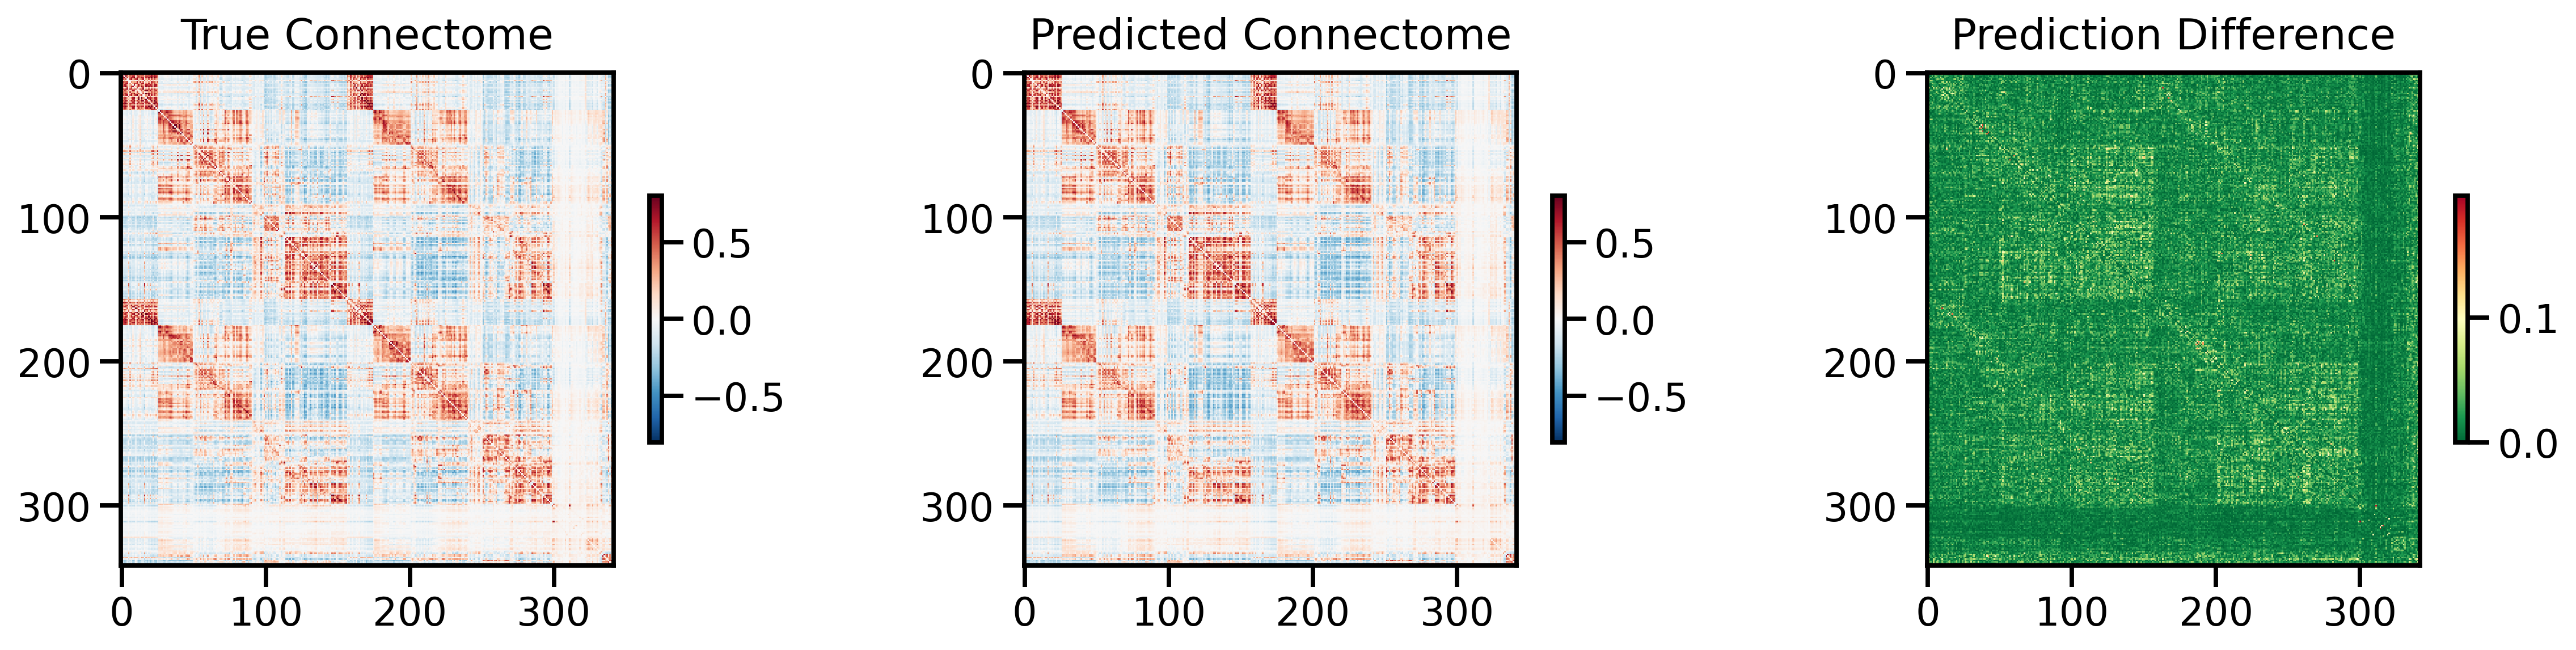

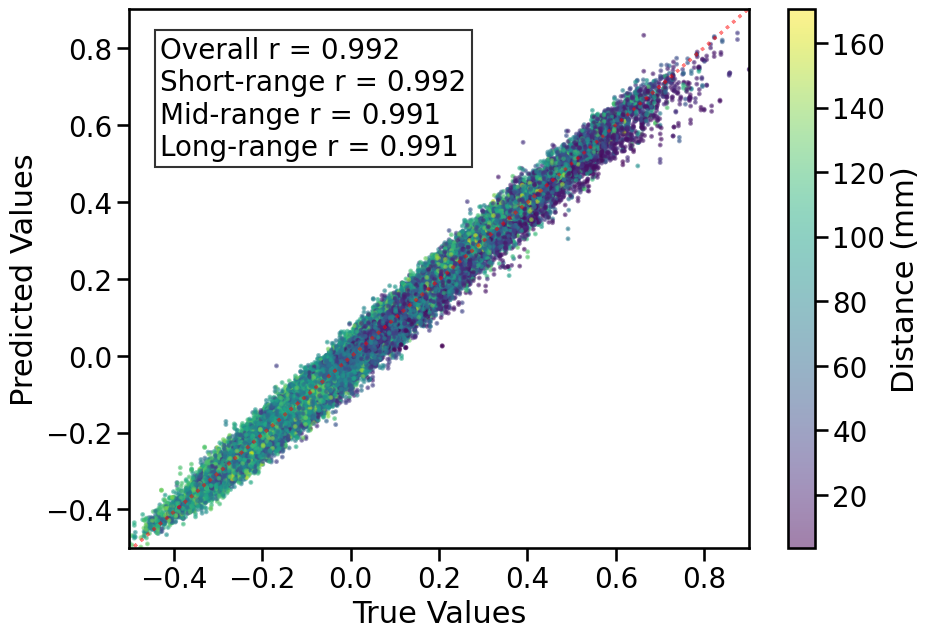

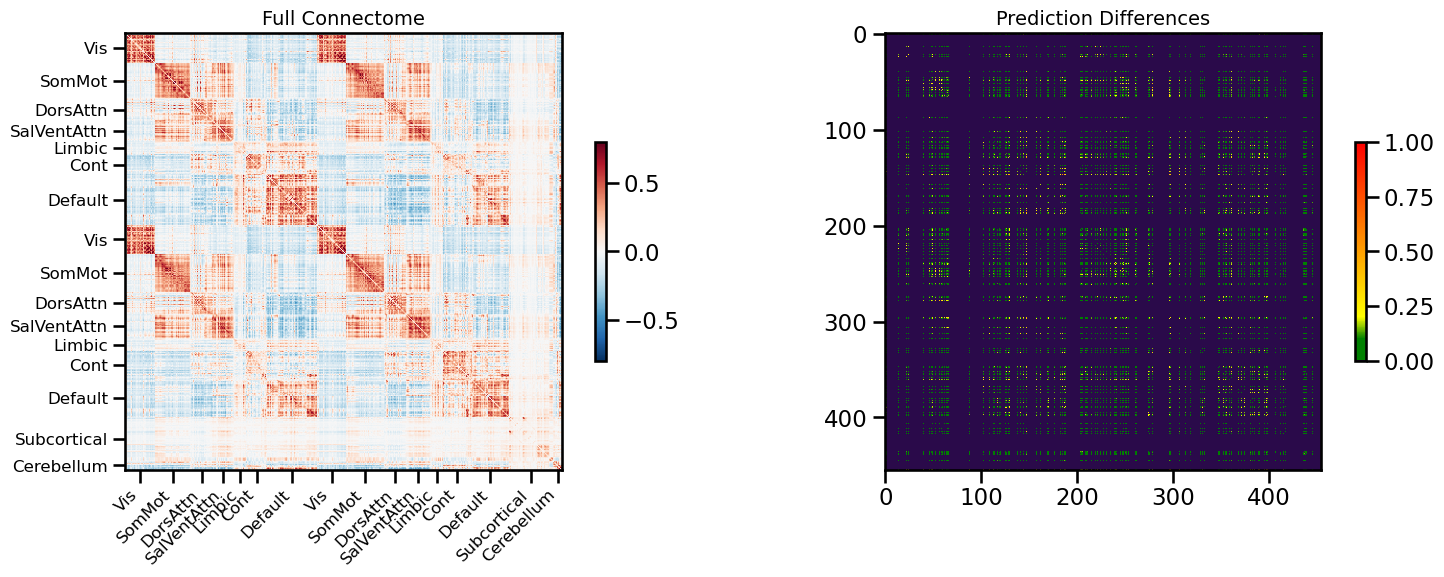

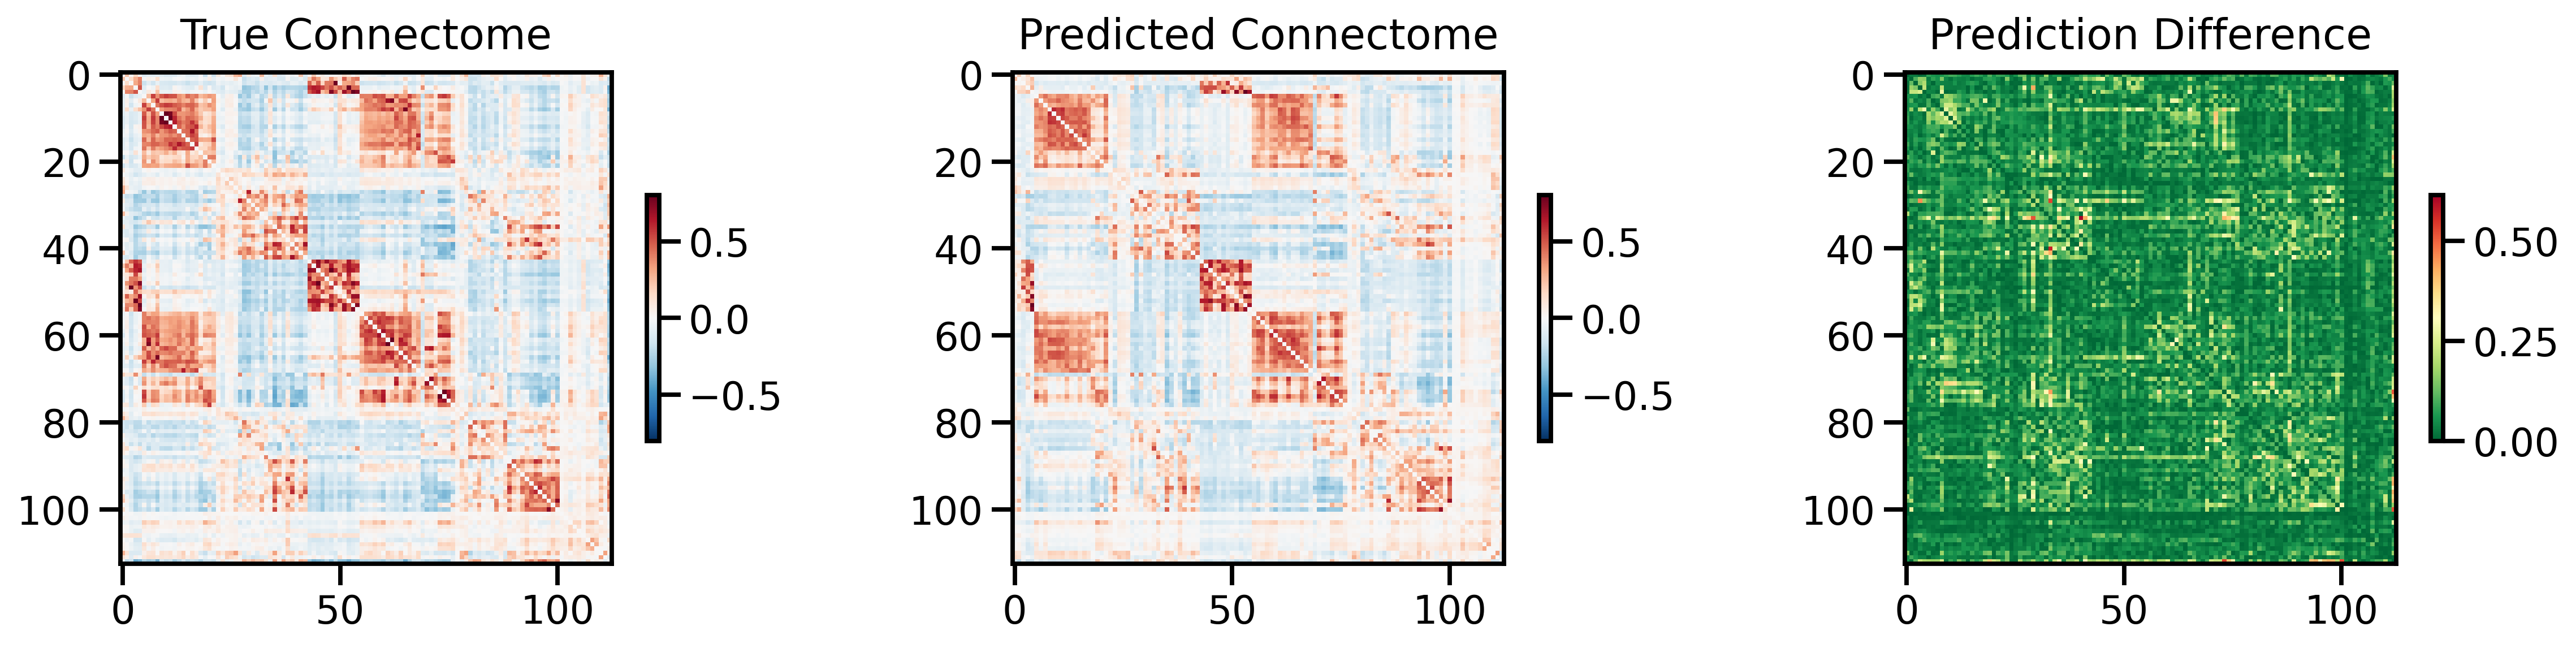

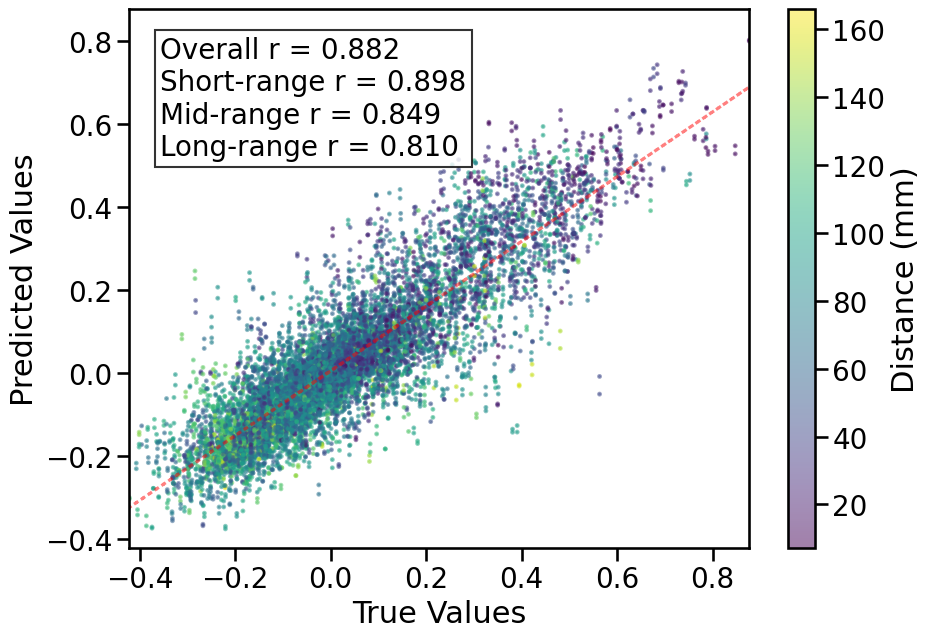


TRAIN METRICS: {'mse': 0.00058362796, 'mae': 0.018144513, 'r2': 0.9822697859292724, 'pearson_r': 0.9915640958848511, 'short_r': 0.9922337939299781, 'mid_r': 0.9906553641557441, 'long_r': 0.9908971565039173, 'geodesic_distance': 13.324547096842359}
TEST METRICS: {'mse': 0.008143287, 'mae': 0.06401777, 'r2': 0.7774034301861571, 'pearson_r': 0.8817099479521023, 'short_r': 0.898057806557395, 'mid_r': 0.8492131008271954, 'long_r': 0.8098892098743041, 'geodesic_distance': 9.005183841683252}
BEST VAL SCORE 0.0
BEST MODEL HYPERPARAMS {'input_dim': 7380, 'binarize': False, 'token_encoder_dim': 60, 'd_model': 128, 'encoder_output_dim': 10, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [256, 128], 'cls_init': 'spatial_learned', 'use_alibi': True, 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 9e-05, 'weight_decay': 0.0001, 'batch_size': 512, 'epochs': 100, 'aug_prob': 0.5}
CPU Usage: 3.2%
RAM Usage: 4.0%
Available RAM: 1.4T
Total RAM: 1.5T
| ID | GPU | MEM |
---------------

18142

In [15]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              hemisphere='both',
              connectome_target='FC',
              binarize=False,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='shared_transformer_cls',
              use_gpu=True, 
              null_model='none', 
              use_folds=[0]
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()